In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
spam_df = pd.read_csv('emails.csv')

In [30]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [0]:
ham = spam_df[spam_df['spam'] == 0]

In [32]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [33]:
spam = spam_df[ spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


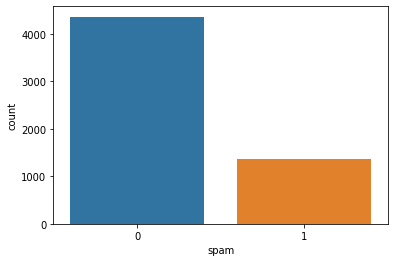

In [34]:
sns.countplot(spam_df['spam'])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
count_vector = CountVectorizer()

In [0]:
spamham_vector = count_vector.fit_transform(spam_df['text'])

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [0]:
label = spam_df['spam'].values

In [40]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
nb_classifier.fit(spamham_vector, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
testing_sample = ['Free money!!', 'hey, if you need any further information']

In [0]:
testing_sample_count_vectorizer = count_vector.transform(testing_sample)

In [0]:
y_pred = nb_classifier.predict(testing_sample_count_vectorizer)

In [45]:
y_pred

array([1, 0])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spamham_vector, label, test_size = 0.2)

In [48]:
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred = nb_classifier.predict(X_train)

In [53]:
cm = confusion_matrix(y_train,y_pred)
cm

array([[3489,   19],
       [   3, 1071]])

In [0]:
y_pred_test = nb_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)

In [55]:
cm_test

array([[844,   8],
       [  2, 292]])